In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

import sklearn
from sklearn.preprocessing import PolynomialFeatures

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

import warnings # supress warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

from sklearn.inspection import DecisionBoundaryDisplay

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Data Preprocessing

In [59]:
# read csv file into dataframe

df = pd.read_csv('Spotify_Youtube.csv')

# print keys
df.keys()
# print top rows
df.head()

# Number of rows
print("Number of rows:",len(df))
# Number of columns
print("Number of variables:", len(df.columns))

Number of rows: 20718
Number of variables: 28


In [60]:
# null values in dataset
df.isnull().sum()

Unnamed: 0            0
Artist                0
Url_spotify           0
Track                 0
Album                 0
Album_type            0
Uri                   0
Danceability          2
Energy                2
Key                   2
Loudness              2
Speechiness           2
Acousticness          2
Instrumentalness      2
Liveness              2
Valence               2
Tempo                 2
Duration_ms           2
Url_youtube         470
Title               470
Channel             470
Views               470
Likes               541
Comments            569
Description         876
Licensed            470
official_video      470
Stream              576
dtype: int64

In [61]:
# dropping null values and fixing song titles
df = df[~df['Track'].str.contains(r'[^A-Za-z0-9\s\(\)]', na=False)]
df.dropna(inplace=True)

# dropping all songs with unlicensed videos
df = df[df['Licensed'] == True]

In [63]:
# Number of rows
print("Number of rows:",len(df))
# Number of columns
print("Number of variables:", len(df.columns))

Number of rows: 8354
Number of variables: 28


Views min:  328.0
Views max:  8079649362.0
Views median:  28827062.0
Views mean:  126771421.59456548


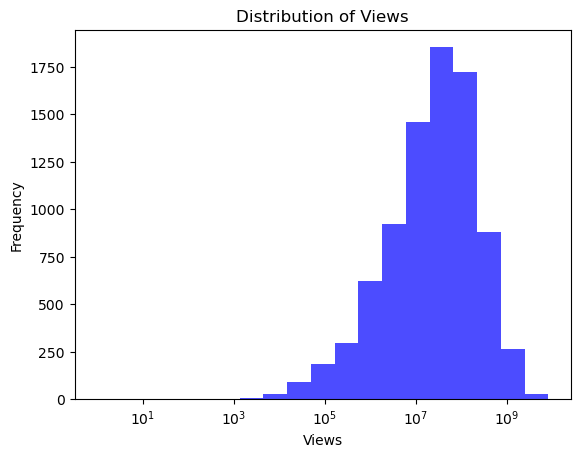

In [64]:
#distribution of views, logarithmic x scale

plt.hist(df["Views"], bins=np.logspace(np.log10(1), np.log10(df["Views"].max()), 20), color='blue', alpha=0.7)
plt.title('Distribution of Views')
plt.xlabel('Views')
plt.ylabel('Frequency')
plt.xscale('log')

views_min = df["Views"].min()
views_max = df["Views"].max()
views_median = df["Views"].median()
views_mean = df["Views"].mean()

print("Views min: ", views_min)
print("Views max: ", views_max)
print("Views median: ", views_median)
print("Views mean: ", views_mean)

Stream min:  6574.0
Stream max:  3386520288.0
Stream median:  60032339.0


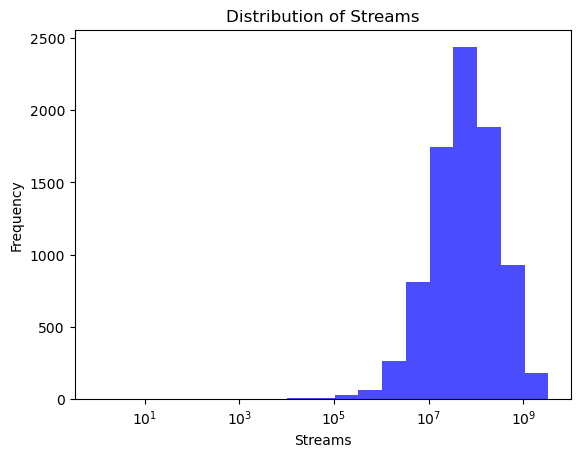

In [65]:
# distribution of streams, logarithmic x scale

plt.hist(df["Stream"], bins=np.logspace(np.log10(1), np.log10(df["Stream"].max()), 20), color='blue', alpha=0.7)
plt.title('Distribution of Streams')
plt.xlabel('Streams')
plt.ylabel('Frequency')
plt.xscale('log')

stream_min = df["Stream"].min()
stream_max = df["Stream"].max()
stream_median = df["Stream"].median()

print("Stream min: ", stream_min)
print("Stream max: ", stream_max)
print("Stream median: ", stream_median)

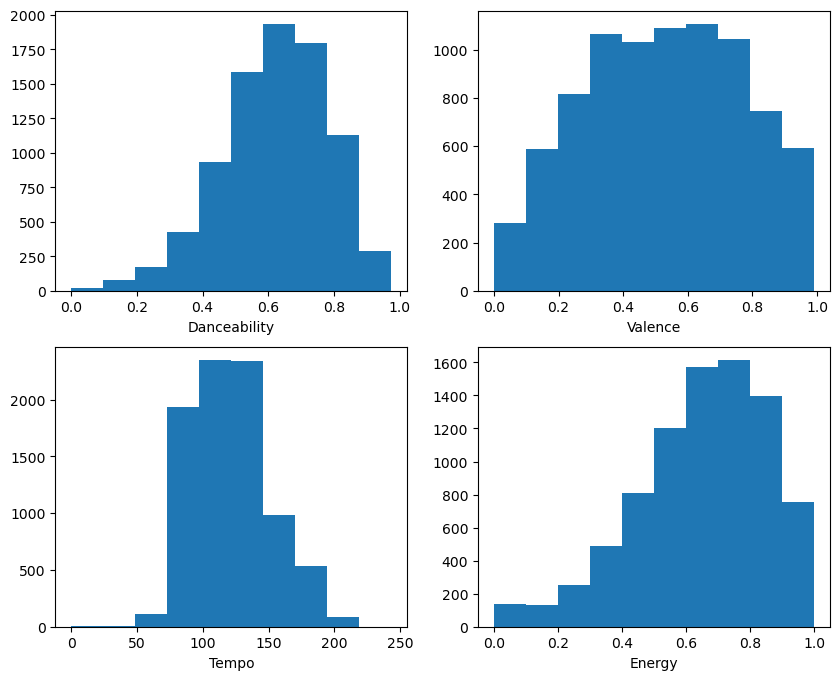

In [66]:
# histogram of four spotify API features 

# four subplots
fig, ((ax, bx), (cx, dx)) = plt.subplots(nrows=2, ncols=2, figsize=(10,8))

#first feature: 'Danceability'
x_index = 0
ax.hist(df["Danceability"])
ax.set_xlabel('Danceability')

# second feature: 'Valence'
x_index = 0
bx.hist(df['Valence'])
bx.set_xlabel('Valence')

# third feature: 'Tempo'
x_index = 0
cx.hist(df['Tempo'])
cx.set_xlabel('Tempo')

# fourth feature: 'Energy'
x_index = 0
dx.hist(df['Energy'])
dx.set_xlabel('Energy')

plt.show()

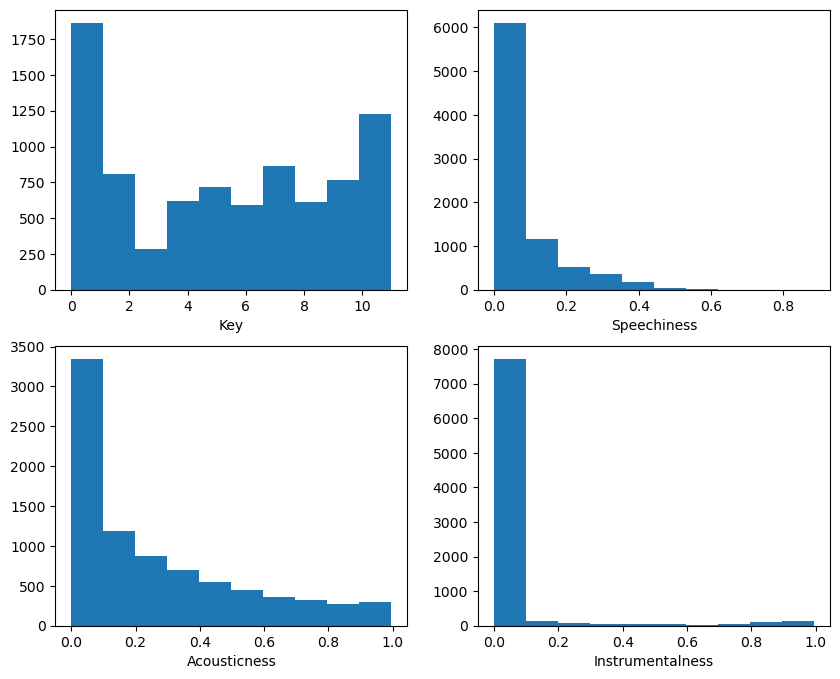

In [67]:
# histogram of four more spotify API features 

# four subplots
fig, ((ex, fx), (hx, gx)) = plt.subplots(nrows=2, ncols=2, figsize=(10,8))

#first feature: 'Danceability'
x_index = 0
ex.hist(df["Key"])
ex.set_xlabel('Key')

# second feature: 'Valence'
x_index = 0
fx.hist(df['Speechiness'])
fx.set_xlabel('Speechiness')

# third feature: 'Tempo'
x_index = 0
hx.hist(df['Acousticness'])
hx.set_xlabel('Acousticness')

# fourth feature: 'Energy'
x_index = 0
gx.hist(df['Instrumentalness'])
gx.set_xlabel('Instrumentalness')

plt.show()

#### Create a variable to classify hit songs 

A song is considered as a hit when it's in top 10% of view and streams variables. Otherwise, it is not a hit.  

In [68]:
# Calculate the 90th percentile (top 10%) for Views and Streams 
views_threshold = df["Views"].quantile(0.9)
streams_threshold = df["Stream"].quantile(0.9)

# Initialize the 'Hit' column with zeros
df["Hit"] = 0

# Loop through each row to determine if the song is a hit
for index, row in df.iterrows():
    # Check if both conditions are met: the song is in the top 10% for both Views and Streams
    if row["Views"] >= views_threshold and row['Stream'] >= streams_threshold:
        df.at[index, "Hit"] = 1  # Set to 1 for hits
    else:
        df.at[index, "Hit"] = 0  # Set to 0 otherwise (this line can be omitted as 'Hit' is initialized to 0)

# Display the first few rows to verify the 'Hit' column
df.head()

,Unnamed: 0,Artist,Url_spotify,Track,Album,Album_type,Uri,Danceability,Energy,Key,...,Title,Channel,Views,Likes,Comments,Description,Licensed,official_video,Stream,Hit
1,1,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Rhinestone Eyes,Plastic Beach,album,spotify:track:1foMv2HQwfQ2vntFf9HFeG,0.676,0.703,8.0,...,Gorillaz - Rhinestone Eyes [Storyboard Film] (...,Gorillaz,72011645.0,1079128.0,31003.0,The official video for Gorillaz - Rhinestone E...,True,True,310083733.0,0
3,3,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,On Melancholy Hill,Plastic Beach,album,spotify:track:0q6LuUqGLUiCPP1cbdwFs3,0.689,0.739,2.0,...,Gorillaz - On Melancholy Hill (Official Video),Gorillaz,211754952.0,1788577.0,55229.0,Follow Gorillaz online:\nhttp://gorillaz.com \...,True,True,434663559.0,0
4,4,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Clint Eastwood,Gorillaz,album,spotify:track:7yMiX7n9SBvadzox8T5jzT,0.663,0.694,10.0,...,Gorillaz - Clint Eastwood (Official Video),Gorillaz,618480958.0,6197318.0,155930.0,The official music video for Gorillaz - Clint ...,True,True,617259738.0,1
5,5,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,DARE,Demon Days,album,spotify:track:4Hff1IjRbLGeLgFgxvHflk,0.760,0.891,11.0,...,Gorillaz - DARE (Official Video),Gorillaz,259021161.0,1844658.0,72008.0,Follow Gorillaz online:\nhttp://gorillaz.com \...,True,True,323850327.0,0
9,9,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Dirty Harry,Demon Days,album,spotify:track:2bfGNzdiRa1jXZRdfssSzR,0.625,0.877,10.0,...,Gorillaz - Dirty Harry (Official Video),Gorillaz,154761056.0,1386920.0,39240.0,Follow Gorillaz online:\nhttp://gorillaz.com \...,True,True,191074713.0,0


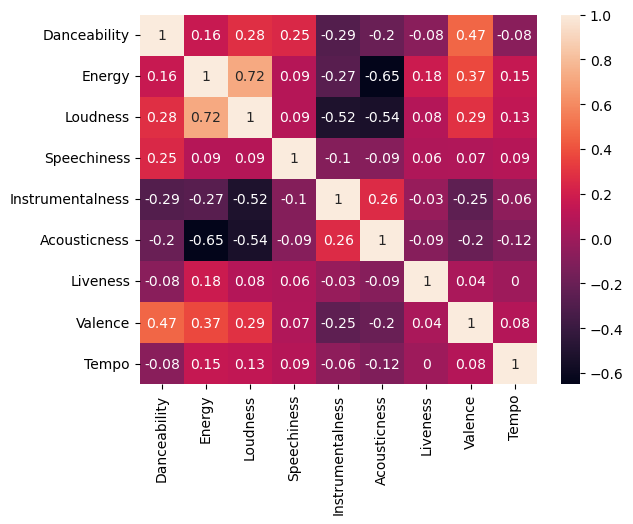

In [73]:
df_corr = df[['Danceability', 'Energy', 'Loudness', 'Speechiness', 'Instrumentalness', 
              'Acousticness', 'Liveness', 'Valence', 'Tempo']].dropna().corr().round(2)

#Correlation matrix heatmap using seaborn
sns.heatmap(df_corr, annot=True)
plt.show()

In [76]:
# Define the independent variables (features) and the dependent variable (target)
X = df[['Danceability', 'Energy', 'Loudness', 'Speechiness', 'Instrumentalness', 'Acousticness', 'Liveness', 'Valence', 'Tempo']]
y = df['Hit']

# Split the data into training and test sets
# Split the data into a training set (70%) and a test set (30%)
X_train, X_test, y_train, y_test = train_test_split(X,y, 
                                     train_size = 0.7, 
                                     test_size = 0.3, 
                                     random_state = 10)

# Create and train the decision tree classifier

clf = DecisionTreeClassifier() #clf to denote classifier
clf.fit(X_train,y_train)

print("Classification reports on test data")

y_pred = clf.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Classification reports on test data
[[2208  143]
 [ 117   39]]
              precision    recall  f1-score   support

           0       0.95      0.94      0.94      2351
           1       0.21      0.25      0.23       156

    accuracy                           0.90      2507
   macro avg       0.58      0.59      0.59      2507
weighted avg       0.90      0.90      0.90      2507



In [74]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

ridge_model = Ridge(alpha=1.0)  # alpha is the regularization strength
ridge_model.fit(X_train, y_train)

y_pred_ridge = ridge_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred_ridge)
print("MSE:", mse)

# Ridge model coefficients
print("Coefficients:", ridge_model.coef_)

MSE: 0.05759367239071763
Coefficients: [ 0.08470279 -0.0805661   0.0057863  -0.06128503 -0.00524634 -0.04922624
  0.01818017 -0.06003429  0.00012765]
